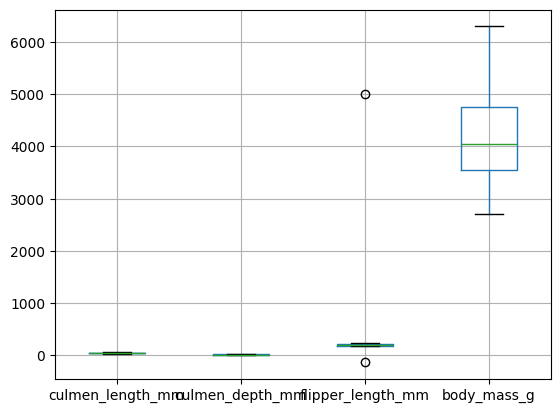

3


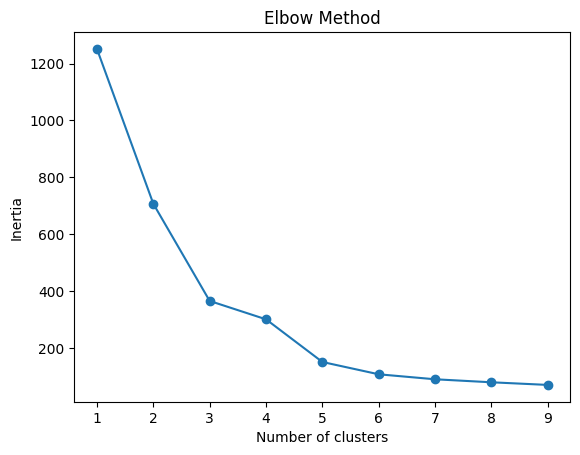

In [14]:
#BÀI TẬP 3.1.3
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

penguins = pd.read_csv('penguins.csv')                 # đúng đường dẫn file của bạn
X_num = penguins.select_dtypes(include=[np.number]).dropna()
penguins_preprocessed = StandardScaler().fit_transform(X_num)

pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4
